Für den Online-Artikel zum Kundenstamm der Bibliothek braucht die Pressestelle einige interessanten Zahlen zum Thema Alter und Bibliotheksnutzung. Außerdem möchte sie die Daten in einer Info-Graphik zusammenstellen.

Für eine erste Demo bist Du verantwortlich:

- Berechne 2-3 Statistiken und erstelle 2-3 Visualisierungen basierend auf den Informationen im Datensatz.
- Nutze pandas zur Berechnung der Statistiken und seaborn für die Visualisierungen.

1. Wie ist die Altersverteilung bei unseren Benutzer/innen?
2. Wie ist die Altersverteilung in den verschiedenen Districts?
3. 2013 gab es verhältnismässig auffällig mehr Neuregistrierungen als 2012. Wie sieht es mit den relativen Altersverteilungen bei den neuregistrierten Benutzer/innen aus. Haben die sich 2013 gegenüber 2012 verändert?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv(
    "../data/Library_Usage.csv",
    na_values="none"
)
# Einlesen des Datensatzes in das neu definierte DataFrame df mit Überschreibung 
#fehlender Werte

In [3]:
df.head()
#Überblick über das DataFrame

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0


### 1. Wie ist die Altersverteilung bei unseren Benutzer/innen?

In [4]:
altersverteilung = df['Age Range'].value_counts()

In [5]:
altersverteilung 
# in absoluten Zahlen

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
Name: Age Range, dtype: int64

Wie sieht die Altersverteilung in relativen Zahlen aus?

In [6]:
altersverteilung_relativ = df['Age Range'].value_counts(normalize=True) 
altersverteilung_relativ

25 to 34 years       0.215208
35 to 44 years       0.159227
10 to 19 years       0.139271
45 to 54 years       0.124026
0 to 9 years         0.090357
65 to 74 years       0.071216
20 to 24 years       0.070318
55 to 59 years       0.050161
60 to 64 years       0.046783
75 years and over    0.033433
Name: Age Range, dtype: float64

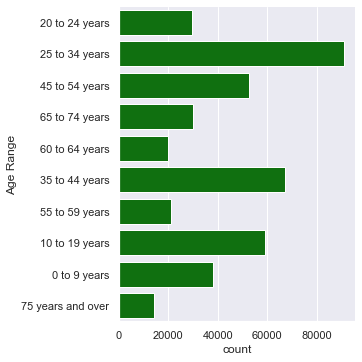

In [7]:
sns.catplot(y ='Age Range',
            data=df, kind='count', color="green")

### 2. Wie ist die Altersverteilung in den verschiedenen Districts?

In [8]:
verteilung_districts = df['Supervisor District'].value_counts(normalize=True)
verteilung_districts

4.0     0.103472
10.0    0.103047
9.0     0.101160
8.0     0.098142
7.0     0.097944
11.0    0.097197
5.0     0.090554
1.0     0.085544
6.0     0.084650
3.0     0.070739
2.0     0.067552
Name: Supervisor District, dtype: float64

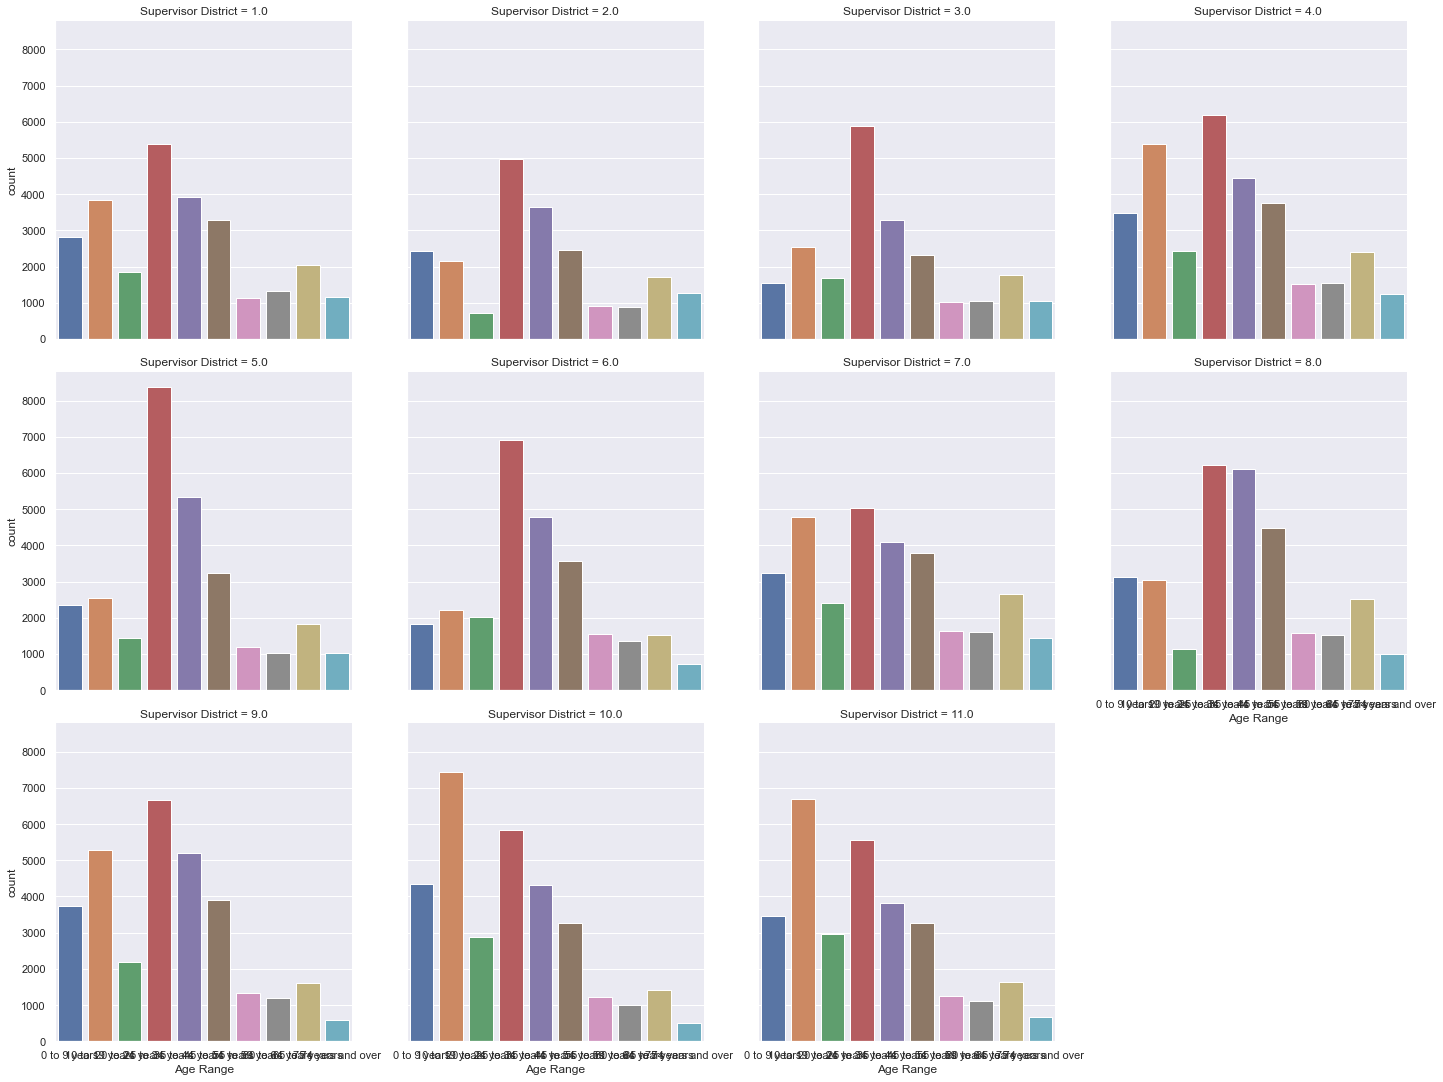

In [9]:
my_order =['0 to 9 years', '10 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 years and over']
sns.catplot(x='Age Range', 
            data=df,order= my_order, kind='count', 
            col='Supervisor District', col_wrap=4)

### 3. 2013 gab es verhältnismässig auffällig mehr Neuregistrierungen als 2012. Wie sieht es mit den relativen Altersverteilungen bei den neuregistrierten Benutzer/innen aus. Haben die sich 2013 gegenüber 2012 verändert?

In [10]:
row_filter = df['Year Patron Registered'] == 2012
früher_registriert = df.loc[row_filter]
früher_registriert

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
16,0,ADULT,0,0,45 to 54 years,M4,Merced,None,None,z,email,True,2012,False,7.0
18,4,WELCOME,0,0,35 to 44 years,M6,Mission,None,None,z,email,True,2012,False,9.0
40,0,ADULT,2,0,35 to 44 years,P3,Parkside,July,2012,z,email,True,2012,False,4.0
43,0,ADULT,0,0,35 to 44 years,M6,Mission,None,None,z,email,True,2012,False,NaN
46,0,ADULT,12,0,25 to 34 years,M2,Marina,October,2013,p,phone,False,2012,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423404,3,SENIOR,6,0,75 years and over,E7,Eureka Valley/Harvey Milk Memorial,December,2012,a,print,False,2012,False,8.0
423411,1,JUVENILE,41,0,0 to 9 years,I5,Ingleside,September,2013,a,print,False,2012,False,7.0
423431,3,SENIOR,0,0,75 years and over,X,Main Library,None,None,z,email,True,2012,False,6.0
423434,1,JUVENILE,10,0,0 to 9 years,V3,Visitacion Valley,September,2015,p,phone,False,2012,False,10.0


In [11]:
altersverteilung_früher = früher_registriert['Age Range'].value_counts(normalize=True) 
altersverteilung_früher

25 to 34 years       0.269115
35 to 44 years       0.166903
0 to 9 years         0.135266
10 to 19 years       0.125451
45 to 54 years       0.099109
20 to 24 years       0.060787
65 to 74 years       0.051133
55 to 59 years       0.037467
60 to 64 years       0.034766
75 years and over    0.020004
Name: Age Range, dtype: float64

In [12]:
row_filter = df['Year Patron Registered'] == 2013
später_registriert = df.loc[row_filter]
später_registriert

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
9,0,ADULT,3,1,60 to 64 years,A5,Anza,June,2016,z,email,True,2013,False,NaN
11,0,ADULT,0,0,25 to 34 years,P7,Potrero,None,None,z,email,True,2013,True,NaN
12,0,ADULT,45,11,25 to 34 years,P3,Parkside,May,2016,z,email,True,2013,False,4.0
21,0,ADULT,1,0,60 to 64 years,X,Main Library,June,2013,z,email,True,2013,True,NaN
30,0,ADULT,2,0,NaN,M2,Marina,September,2013,z,email,True,2013,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423374,1,JUVENILE,12,1,0 to 9 years,G4,Glen Park,June,2016,p,phone,True,2013,False,8.0
423392,1,JUVENILE,435,67,0 to 9 years,C2,Chinatown,July,2016,p,phone,False,2013,False,3.0
423419,0,ADULT,0,0,60 to 64 years,E7,Eureka Valley/Harvey Milk Memorial,None,None,p,phone,False,2013,False,7.0
423425,1,JUVENILE,21,0,0 to 9 years,O7,Ortega,September,2015,z,email,True,2013,False,4.0


In [13]:
altersverteilung_später = später_registriert['Age Range'].value_counts(normalize=True) 
altersverteilung_später

25 to 34 years       0.275034
35 to 44 years       0.157017
0 to 9 years         0.134550
10 to 19 years       0.110756
45 to 54 years       0.099637
20 to 24 years       0.073001
65 to 74 years       0.053459
55 to 59 years       0.039062
60 to 64 years       0.036780
75 years and over    0.020703
Name: Age Range, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='Age Range'>

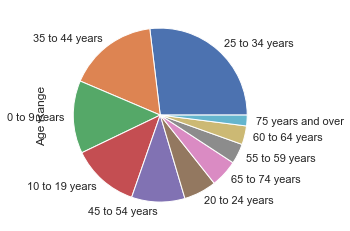

In [14]:
altersverteilung_früher.plot(kind="pie")

Visualisierung 2012

<AxesSubplot:ylabel='Age Range'>

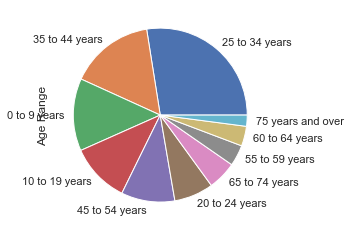

In [15]:
altersverteilung_später.plot(kind="pie")

Visualisierung 2013 -> die Altersverteilung der beiden Jahre ist sehr ähnlich

In [16]:
frames = [altersverteilung_früher, altersverteilung_später]
result = pd.concat (frames)
result

25 to 34 years       0.269115
35 to 44 years       0.166903
0 to 9 years         0.135266
10 to 19 years       0.125451
45 to 54 years       0.099109
20 to 24 years       0.060787
65 to 74 years       0.051133
55 to 59 years       0.037467
60 to 64 years       0.034766
75 years and over    0.020004
25 to 34 years       0.275034
35 to 44 years       0.157017
0 to 9 years         0.134550
10 to 19 years       0.110756
45 to 54 years       0.099637
20 to 24 years       0.073001
65 to 74 years       0.053459
55 to 59 years       0.039062
60 to 64 years       0.036780
75 years and over    0.020703
Name: Age Range, dtype: float64

Eigentlich wollte ich die beiden DF zusammenfügen und dann eine Graphik erstellen. Leider habe ich es nicht geschafft, die Jahre "2012" und "2013" bzw. "früher" oder "später" als key mitzugeben...

[AL] Sowohl die Fragestellungen, als auch die Herangehensweise sind sehr gut.
Die fehlende Visualisierung der beiden Altersverteilungen ist eine wunderbare Aufgabe für unseren Präsenztag!